<a href="https://colab.research.google.com/github/juliadmytrenko/PokemonRecognizer/blob/main/PokemonRecognizer_with_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cześć 🤠
Tworzę te prostą sieć, aby nauczyć się samej obrabiać dane i dostosywać hiperparametry.

Projekt ten polega na tym, aby rozpoznać czy dany pluszak/zabawka to któryś z dwóch pokemonów (Jigglypuff, Bulbasaur).

Jeżeli jest prawdopodobieństwo większe niż załóżmy 75%, wtedy uznaję, że warto przejrzeć daną ofertę z OLX, Allegro, eBay etc.

# very simple easy todos for very slow learners

- czy bibliotek do obrazów `Pillow` jest w stanie mi wczytać obrazek w formacie `jfif` ? Odp. TAK

In [ ]:
from PIL import Image
import os

# importing the image
img = Image.open("/content/drive/MyDrive/Życie/ml/pokemony/train/Jigglypuff/2.jfif")
print("The size of the image before conversion : ", end = "")
print(os.path.getsize("/content/drive/MyDrive/Życie/ml/pokemony/train/Jigglypuff/2.jfif"))

The size of the image before conversion : 42534


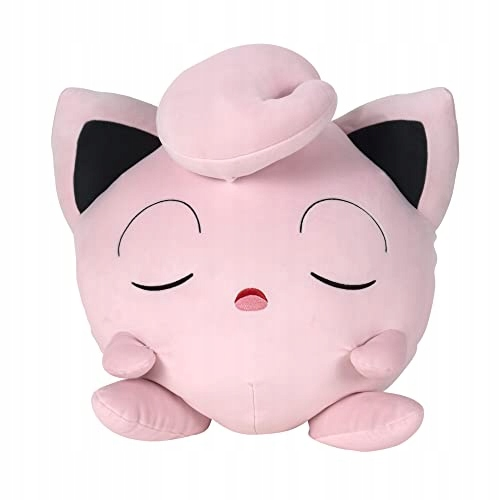

In [ ]:
img

Teraz wczytujemy wszystkie obrazki.
Na razie nie zipuję obrazków, bo jest ich mało i nie mam potrzeby ich zipować, żeby mieć więcej miejsca na dysku, ale jak się zwiększy dataset to to zrobię lol aaaaaaaa

In [ ]:
from pathlib import Path
data_path = Path("/content/drive/MyDrive/Życie/ml")

image_path = data_path / "pokemony"

image_path_list = list(image_path.glob("*/*/*.*")) # wszystkie zdj z ml

# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
samples_dir = image_path / "samples"

train_dir

PosixPath('/content/drive/MyDrive/Życie/ml/pokemony/train')

In [ ]:
# image_path_list

Zmienia strukture folderów na odpowiednią. Przechodzę do wczytywania obrazków poprzez defaultowy ImageFolder

In [ ]:
import torch
from torchvision import datasets, transforms

data_transform = None # na razie nie transormuje wcale

data_transform = transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(root=train_dir,
                                   transform=data_transform,
                                   target_transform=None) # transform for the target/label

test_data = datasets.ImageFolder(test_dir,
                                transform=data_transform,
                                target_transform=None)

train_data

Dataset ImageFolder
    Number of datapoints: 52
    Root location: /content/drive/MyDrive/Życie/ml/pokemony/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
train_data.classes # poprawnie wywietla klasy najs

['Bulbasaur', 'Jigglypuff', 'Others']

In [ ]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'Bulbasaur': 0, 'Jigglypuff': 1, 'Others': 2}

In [ ]:
len(train_data)
train_data[0]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 0)

42????? miało ich być 25. Coś jest nie tak. Wyświętlę wszystkie obrazki

In [ ]:

train_data[25][0]

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

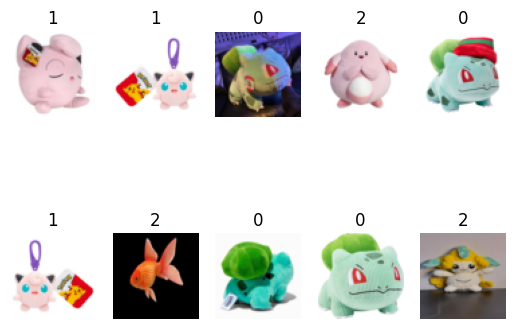

In [ ]:
import matplotlib.pyplot as plt
import random

for i, (image, label) in enumerate(random.choices(train_data, k=10)):
  plt.subplot(2, 5, i+1) # omg to było takie proste, ale lepiej wolno niż wcale co nie?
  plt.imshow(transforms.functional.to_pil_image(image, mode=None))
  plt.title(label)
  plt.axis("off")

# Dobra, przechodzę do "mięsa" tego projektu.

Ciekawe jak smakuje mięso z pokemonów.

In [ ]:
from torch import nn
from torch.utils.data import DataLoader
import os
os.cpu_count()

device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup the batch size hyperparameter
BATCH_SIZE = 8

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
# for test data the order doesn't really matter because the model does not learn on test data
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
len(train_dataloader) # będzie jedynie 6 batches chyba tylko

7

# TODO WAŻNE

stworzyć sobie folder helper-functions i models i z niego importować te funkcje zamiast je całe kopiować

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, # there's a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion = szybciej się liczy


In [ ]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    device: torch.device = device,
):
  train_loss, train_acc = 0, 0

  model.train()

  # Add a loop to loo[ through the training batches
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X) # outpus the raw logits from the model

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item() # accumulate train loss
    # train_acc += torchmetrics.functional.accuracy(y_pred.argmax(dim=1), y, task="multiclass", num_classes=num_classes)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimzer step
    optimizer.step()

    # Calculate accuracy metric INNA METODA
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)


  # Divide total train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  return train_loss, train_acc



In [ ]:
def dev_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    device: torch.device = device,
):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred_logits = model(X_test)
      # Calculate the loss (accumulatively)
      loss = loss_fn(test_pred_logits, y_test)
      test_loss += loss.item()
      # Calc acc
      # test_acc += torchmetrics.functional.accuracy(test_pred.argmax(dim=1), y_test, task="multiclass", num_classes=num_classes)
    # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y_test).sum().item()/len(test_pred_labels))
    # calculate the test loss average per batch

  test_loss /= len(data_loader)
  test_acc /= len(data_loader)

  return test_loss, test_acc

In [ ]:
!pip install -q torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 772.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00


In [ ]:
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
  """Prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
from tqdm.auto import tqdm

def train(epochs: int,
          model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          device=device,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss()):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  for epoch in tqdm(range(epochs)):
    # Add a loop to loop through the training batches

    train_loss, train_acc = train_step(
      model = model,
      data_loader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      device = device
    )

    test_loss, test_acc = dev_step(
      model = model,
      data_loader = test_dataloader,
      loss_fn = loss_fn,
      device = device
    )

      # 4. Print out what's happening
    # print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | ")
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results


In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

4
Epoch: 0 | Train loss: 1.1067 | Train acc: 0.3393 | Test loss: 1.1876 | Test acc: 0.2500
4
Epoch: 1 | Train loss: 1.0671 | Train acc: 0.4286 | Test loss: 1.2726 | Test acc: 0.2812
4
Epoch: 2 | Train loss: 1.0391 | Train acc: 0.4464 | Test loss: 1.2520 | Test acc: 0.2812
4
Epoch: 3 | Train loss: 1.0390 | Train acc: 0.4464 | Test loss: 1.2171 | Test acc: 0.2812
4
Epoch: 4 | Train loss: 1.0274 | Train acc: 0.4286 | Test loss: 1.2649 | Test acc: 0.2812
4
Epoch: 5 | Train loss: 0.9999 | Train acc: 0.4107 | Test loss: 1.2368 | Test acc: 0.2812
4
Epoch: 6 | Train loss: 0.9961 | Train acc: 0.5357 | Test loss: 1.2057 | Test acc: 0.3438
4
Epoch: 7 | Train loss: 1.0075 | Train acc: 0.3750 | Test loss: 1.1610 | Test acc: 0.4375
4
Epoch: 8 | Train loss: 0.9138 | Train acc: 0.5536 | Test loss: 1.1767 | Test acc: 0.3750
4
Epoch: 9 | Train loss: 0.8883 | Train acc: 0.5000 | Test loss: 1.0154 | Test acc: 0.5000
4
Epoch: 10 | Train loss: 0.8521 | Train acc: 0.6429 | Test loss: 1.0743 | Test acc: 0.531

# ZA PIERWSZYM ODPALENIEM MAM JUŻ ACC na 93% procent train, to dobrze.

Teraz zobaczyć czy nie jest przetrenowany dataset czyli dodać test set. Test set to na razie będzie 10 przykładów.

OMG dodałam 10 przykładów dla każdej klasy czyli łącznie 20zdj
i mam genialne wyniki:
100% acc dla train test i 95% dla test set. Teraz zapiszę model i podam już wytrenowanemu modelowi różne samples z neta.

te wyniki otrzymałam z tą samą konfiguracją co w Digits czyli klasyczny TinyVGG i ustawiłam idealnie na 20 epok.

## Jeszcze wykresy

In [ ]:
from typing import Tuple, Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a result dictionary."""
  # Get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  #Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

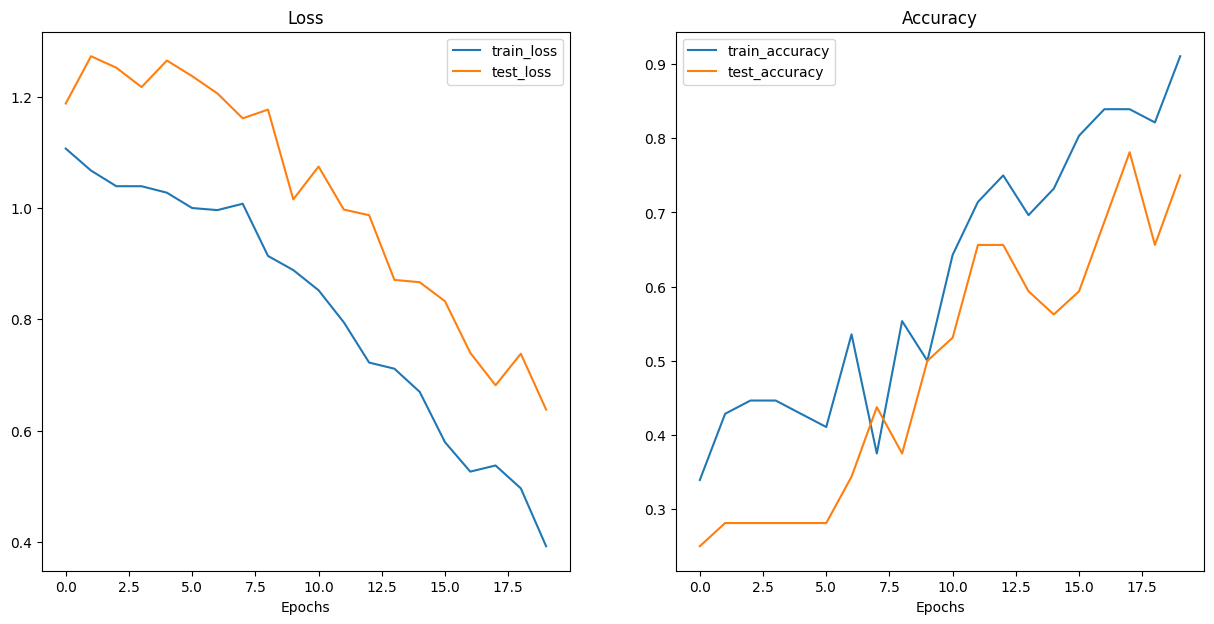

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
### Wyświetlanie randomowych przykładów i wyników dla nich z modelu

In [ ]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shoudn't be larger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))
  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, weight] -> [height, weight, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
      plt.title(title)


In [ ]:
  random_samples_idx = random.sample(range(len(train_data)), k=10)
  random_samples_idx

[15, 8, 36, 42, 14, 43, 45, 28, 46, 34]

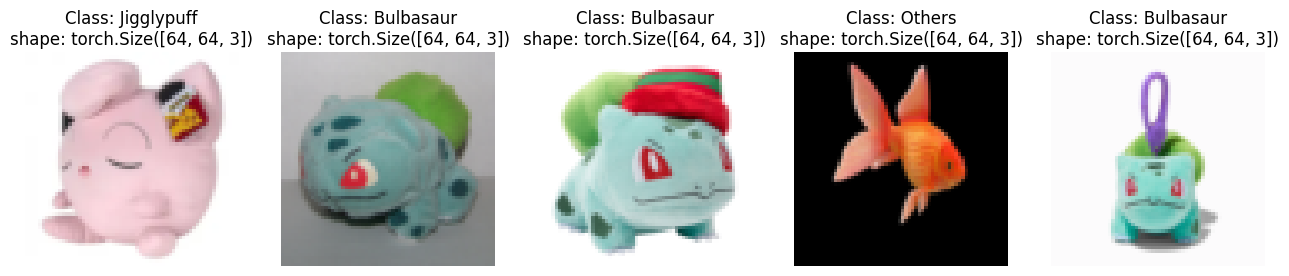

In [ ]:
class_names = train_data.classes
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=42)

### Wyszły mi takie dobre wyniki, bo łatwo jest rozróżnić te pokemony, już po samych kolorach, a jak zadziałą na nowe podobne pokemony?

Let's find out.

In [ ]:
data_transform = transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    # transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [ ]:
samples_data = datasets.ImageFolder(root=samples_dir,
                                   transform=data_transform,
                                   target_transform=None) # transform for the target/label

BATCH_SIZE=len(samples_data)
samples_dataloader = DataLoader(dataset=samples_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
# test_loss, test_acc = test_step(model=model_0,data_loader= samples_dataloader, loss_fn= loss_fn, device= device)
# test_loss, test_acc

In [ ]:
samples_data

Dataset ImageFolder
    Number of datapoints: 7
    Root location: /content/drive/MyDrive/Życie/ml/pokemony/samples
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [ ]:
!pip install colorama
from colorama import Fore, Back, Style

In [ ]:
!pip install -q torchmetrics

In [ ]:
num_classes = 3

# Definiujemy kilka metryk jednocześnie
metrics = torchmetrics.MetricCollection({
    "Accuracy": torchmetrics.Accuracy(task="multiclass", num_classes=num_classes),
    "Precision": torchmetrics.Precision(task="multiclass", num_classes=num_classes),
    "Recall": torchmetrics.Recall(task="multiclass", num_classes=num_classes),
    "F1-score": torchmetrics.F1Score(task="multiclass", num_classes=num_classes),
})

Predicted: Jigglypuff, True label: Bulbasaur | preds 22.89%, 61.65%, 15.47%



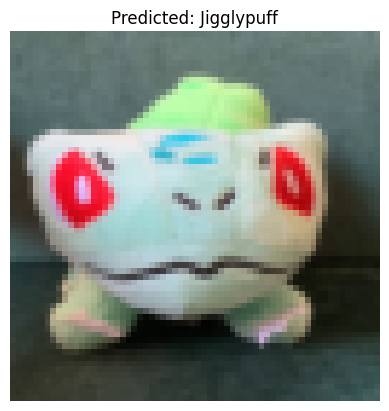




Predicted: Bulbasaur, True label: Bulbasaur | preds 81.36%, 6.94%, 11.7%



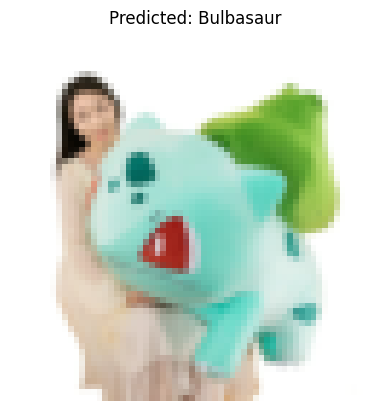




Predicted: Bulbasaur, True label: Bulbasaur | preds 71.63%, 2.09%, 26.28%



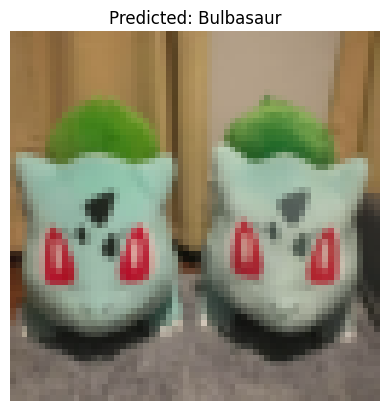




Predicted: Jigglypuff, True label: Jigglypuff | preds 16.15%, 71.87%, 11.98%



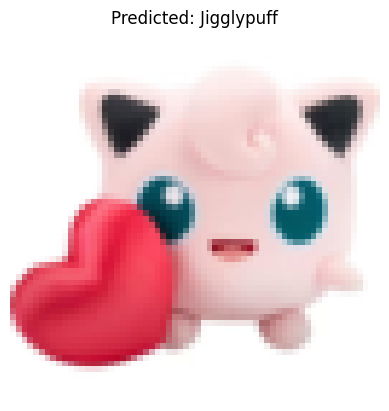




Predicted: Jigglypuff, True label: Jigglypuff | preds 22.7%, 63.53%, 13.76%



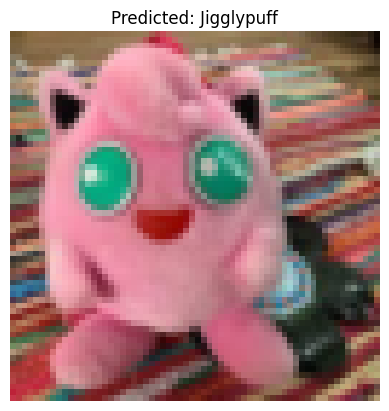




Predicted: Others, True label: Jigglypuff | preds 28.09%, 16.48%, 55.43%



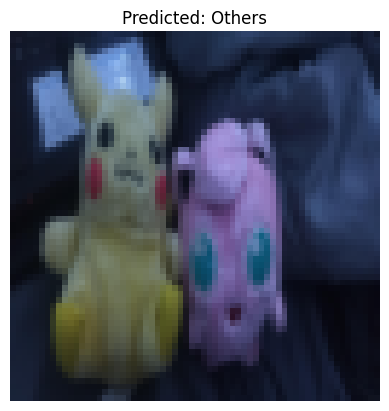




Predicted: Others, True label: Others | preds 37.51%, 0.36%, 62.13%



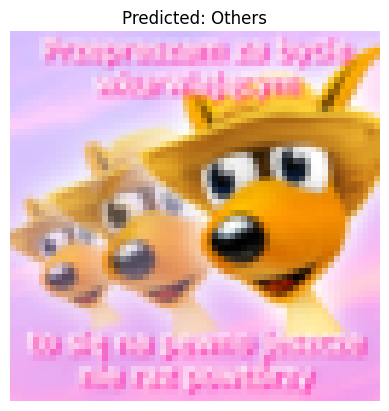

In [ ]:
# plt.figure(figsize=(6, 3))
def test():
  for batch, (X, y) in samples_dataloader:
    # plt.figure(figsize=(10, 10))
    # plt.subplot(4,2, batch+1)
    image = transforms.functional.to_pil_image(X.squeeze(0), mode=None)
    plt.imshow(image)

    model_0.eval()
    with torch.inference_mode():
      logits = model_0(X.to(device))
      preds = logits.softmax(dim=1)
      # print(preds)
      label_number = preds.argmax(dim=1)
      predicted_label = samples_data.classes[label_number]
      actual_label = samples_data.classes[y.item()]


    preds_str = preds.cpu().numpy()
    # print(f"wtf: {preds_str[0][0]}")
    print(f"Predicted: {predicted_label}, True label: {actual_label} | preds {Fore.GREEN + str(round( preds_str[0][0]*100, 2 ))}%, {Fore.MAGENTA + str(round(preds_str[0][1]*100, 2))}%, {Fore.BLUE + str(round( preds_str[0][2]*100, 2 ))}%")
    print(Style.RESET_ALL)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()
    print("\n\n")

  results = metrics(preds, targets)



In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'Bulbasaur': 0, 'Jigglypuff': 1, 'Others': 2}

In [ ]:
samples_data.classes

['Bulbasaur', 'Jigglypuff', 'Others']

# testuję pojedyńczy obrazek


In [ ]:
# Download cutom image
import requests

# Setup cutom image path
custom_image_path = data_path / "pokemony" / "Others" / "jirachi.jpg"

# Download the image if it doesn't already exists
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # When downloading from GitHub, need to use the "raw" file link
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)

else:
  print(f"{custom_image_path} already exists, skipping download...")

/content/drive/MyDrive/Życie/ml/pokemony/Others/jirachi.jpg already exists, skipping download...


In [ ]:
import torchvision

data_transform_sample = transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64, 64)),
    # Turn the image into a torch.Tensor
    transforms.ToTensor(),
])

custom_image_uint8 = torchvision.io.read_image(custom_image_path)
custom_image_PIL = transforms.functional.to_pil_image(custom_image_uint8, mode=None)
# custom_image_uint8 = custom_image_uint8.type(torch.float32) / 255
custom_image_transformed = data_transform_sample(custom_image_PIL).to(device)
custom_image_transformed_with_batch = custom_image_transformed.unsqueeze(0)


In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(custom_image_transformed_with_batch)
  y_preds = y_logits.softmax(dim=1)


print(y_preds)

tensor([[0.5441, 0.0034, 0.4525]])


tensor([[0.5441, 0.0034, 0.4525]])


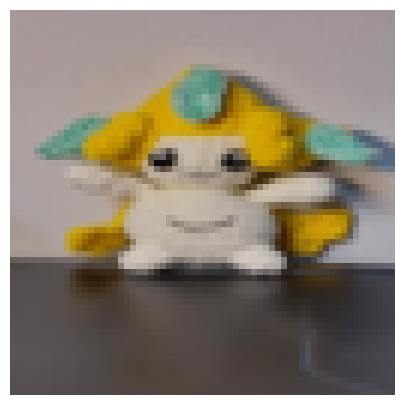

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(custom_image_transformed.permute(1,2,0).cpu().numpy())
plt.axis("off")
print(y_preds.cpu())
plt.show()